In [284]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [165]:
def to_string(obj, f):
    if not isinstance(obj, h5py.Dataset):
        obj = f[obj]
    return ''.join([chr(int(i)) for i in obj[()]])

In [1]:
data_path = '../__data__/Mary-Anesthesia-20160809-01.mat'

In [314]:
f = h5py.File(data_path, 'r')
print(f.keys())

<KeysViewHDF5 ['#refs#', '#subsystem#', 'ain', 'ainSchema', 'analogChnlInfo', 'electrodeInfo', 'eventSchema', 'fileInfo', 'lfp', 'lfpSchema', 'sessionInfo', 'spikeChnlInfo', 'spikeTimes', 'spikeTimesSchema', 'trialInfo', 'unitInfo']>


In [258]:
print(f['lfpSchema'].keys())
# to_string(f['lfpSchema']['timeUnits'], f)
for index in f['lfpSchema']['index'][:, 0]:
    print(f[index][()].shape)
    break

<KeysViewHDF5 ['dataDim', 'dataUnits', 'description', 'dims', 'history', 'index', 'indexUnits', 'mask', 'smpInterval', 'smpRate', 'timeUnits', 'userData']>
(7085396, 1)


In [166]:
## SESSION INFO
sessionInfo = f['sessionInfo']
print(sessionInfo.keys())
print(''.join([chr(int(i)) for i in sessionInfo[sessionInfo['drug'][0][0]][()]]))
print(sessionInfo['drugDose'][()])
print(sessionInfo['drugDuration'][()])
print(sessionInfo['eyesClose'][()])
print(sessionInfo['eyesOpen'][()])
for array in sessionInfo['arrays']:
    print(to_string(array[0], f))
for area in sessionInfo['areas']:
    print(to_string(area[0], f))
print(sessionInfo)

<KeysViewHDF5 ['NSPs', 'Properties', 'areas', 'arrays', 'drug', 'drugDose', 'drugDuration', 'drugEnd', 'drugStart', 'drugTask', 'eyesClose', 'eyesOpen', 'hasDrug', 'hasWakeUpTest', 'numCorrect', 'numTrials', 'pctBadTrials', 'pctCorrect', 'session', 'subject', 'tasks']>
propofol
[[0.58]
 [0.32]]
[[30.]
 [30.]]
[[2254.01273333]
 [2315.67226667]]
[[5588.81433333]
 [5618.68623333]]
PFC
FEF
STG
PPC
vlPFC
FEF
CPB
7b


In [242]:
## SPIKE TIMES (in seconds)
spikeTimes = f['spikeTimes']
for unit in spikeTimes[:, 0]:
    print(f[unit][()])
    spike_times = f[unit][()]
    break
print(spikeTimes)

[[2.12466667e-01]
 [5.03000000e-01]
 [5.49900000e-01]
 ...
 [7.08538020e+03]
 [7.08538333e+03]
 [7.08538683e+03]]
<HDF5 dataset "spikeTimes": shape (248, 1), type "|O">


- bins of size 50 ms, 100ms
- non-overlapping stride

In [261]:
## ANALOG IN 
ain = f['ain']
# for unit in spikeTimes:
#     print(f[unit[0]][()])
#     break

In [294]:
airPuff = ain[7, :]
EMG = ain[10, :]

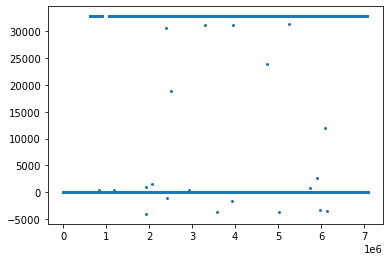

In [312]:
dt = 0.001
airPuff_sig = airPuff
plt.scatter(np.arange(len(airPuff_sig)), airPuff_sig, s=4)
# length = 1
# signal = EMG[int(3000/dt):int((3000 + length)/dt)]
# plt.scatter(np.arange(len(signal)), signal)
plt.show()

In [280]:
## ainSchema
ainSchema = f['ainSchema']
print(ainSchema.keys())
print(to_string(ainSchema['description'], f))
for index in ainSchema['index'][:, 0]:
    print(f[index])
for item in f[ainSchema['index'][1, 0]][:, 0]:
    print(to_string(item, f))

<KeysViewHDF5 ['dataDim', 'dataUnits', 'description', 'dims', 'history', 'index', 'indexUnits', 'mask', 'smpInterval', 'smpRate', 'timeUnits', 'userData']>
Auxiliary AnalogIn (AIN) data
<HDF5 dataset "wRc": shape (7085396, 1), type "<f8">
<HDF5 dataset "xRc": shape (15, 1), type "|O">
Mary-Anesthesia-20160809-01.reward
Mary-Anesthesia-20160809-01.eyePosX
Mary-Anesthesia-20160809-01.eyePosY
Mary-Anesthesia-20160809-01.pupilSize
Mary-Anesthesia-20160809-01.drugInfusion
Mary-Anesthesia-20160809-01.bar
Mary-Anesthesia-20160809-01.audio
Mary-Anesthesia-20160809-01.airPuff
Mary-Anesthesia-20160809-01.EEG
Mary-Anesthesia-20160809-01.EMG
Mary-Anesthesia-20160809-01.EEGbipolar
Mary-Anesthesia-20160809-01.cereStim
Mary-Anesthesia-20160809-01.SpO2
Mary-Anesthesia-20160809-01.heartRate
Mary-Anesthesia-20160809-01.cereStim_PPCSTG


In [263]:
## analogChnlInfo
analogChnlInfo = f['analogChnlInfo']
print(analogChnlInfo.keys())
analogChnlInfo['analogUnits']
analogChnlInfo['chnlLabel']

<KeysViewHDF5 ['Properties', 'analogRange', 'analogUnits', 'channel', 'chnlID', 'chnlLabel', 'd2aFactor', 'digitalRange', 'electrode', 'file', 'filterCutoff', 'isAIN', 'isLFP', 'numSamples', 'session', 'smpRate']>


<HDF5 dataset "chnlLabel": shape (1, 268), type "|O">

In [227]:
## electrodeInfo
electrodeInfo = f['electrodeInfo']
print(electrodeInfo.keys())
print(electrodeInfo['hasLFP'])
# for file in electrodeInfo['file'][()][0]:
#     print(to_string(file, f))
# for area in electrodeInfo['area'][()][0]:
#     print(to_string(area, f))
print(electrodeInfo['gridLoc'])
for chnlID in electrodeInfo['chnlID'][()][0]:
    print(to_string(chnlID, f))

<KeysViewHDF5 ['NSP', 'Properties', 'area', 'array', 'channel', 'chnlID', 'electrode', 'file', 'gridLoc', 'hasLFP', 'hemisphere', 'numUnits', 'session']>
<HDF5 dataset "hasLFP": shape (1, 253), type "|u1">
<HDF5 dataset "gridLoc": shape (2, 253), type "<f8">
Mary-Anesthesia-20160809-01.001
Mary-Anesthesia-20160809-01.002
Mary-Anesthesia-20160809-01.003
Mary-Anesthesia-20160809-01.004
Mary-Anesthesia-20160809-01.005
Mary-Anesthesia-20160809-01.006
Mary-Anesthesia-20160809-01.007
Mary-Anesthesia-20160809-01.008
Mary-Anesthesia-20160809-01.009
Mary-Anesthesia-20160809-01.010
Mary-Anesthesia-20160809-01.011
Mary-Anesthesia-20160809-01.012
Mary-Anesthesia-20160809-01.013
Mary-Anesthesia-20160809-01.014
Mary-Anesthesia-20160809-01.015
Mary-Anesthesia-20160809-01.016
Mary-Anesthesia-20160809-01.017
Mary-Anesthesia-20160809-01.018
Mary-Anesthesia-20160809-01.019
Mary-Anesthesia-20160809-01.020
Mary-Anesthesia-20160809-01.021
Mary-Anesthesia-20160809-01.022
Mary-Anesthesia-20160809-01.023
Mary-

In [260]:
lfp = f['lfp']
lfp.shape

(253, 7085396)

In [243]:
## unitInfo
unitInfo = f['unitInfo']
print(unitInfo.keys())
# for file in electrodeInfo['file'][()][0]:
#     print(to_string(file, f))
print(unitInfo['area'])
for area in unitInfo['area'][()][0]:
    print(to_string(area, f))

<KeysViewHDF5 ['NSP', 'Properties', 'area', 'array', 'channel', 'chnlID', 'electrode', 'file', 'gridLoc', 'hemisphere', 'numSpikes', 'session', 'unit', 'unitID']>
<HDF5 dataset "area": shape (1, 248), type "|O">
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vlPFC
vl